In [8]:
from single_nav_analysis import NavAnalysisConfig, SingleNavAnalysis
from pathlib import Path
import numpy as np


nav_analysis_config = NavAnalysisConfig(
    bench_data_path=Path(r"C:\Euclid_Jie\barra\src\nav_analysis\index_data.csv"),
    nav_data_path=Path(r"C:\Euclid_Jie\barra\submodule\nav_analysis\nav_data\SXL736-永誉天泽经纶四号净值序列.xlsx"),
    # begin_date=np.datetime64("2024-01-01"),
    open_html=False,
    # benchmark="SHSE.000905",
)
demo = SingleNavAnalysis(nav_analysis_config)
# demo.name = "子午500指数增强定制一号"
demo.analysis()
demo.export_html(save=True)
demo

开始读取SXL736-永誉天泽经纶四号净值序列净值数据
原始数据时间区间为：2022-10-17 ~ 2024-07-30
本次统计时间区间为：2022-10-17 ~ 2024-07-30
html路径为：C:\Euclid_Jie\barra\submodule\nav_analysis\nav_data\20221017_20240730_SXL736-永誉天泽经纶四号净值序列_nav_analysis.html


SXL736-永誉天泽经纶四号净值序列净值分析[D]：2022-10-17 ~ 2024-07-30

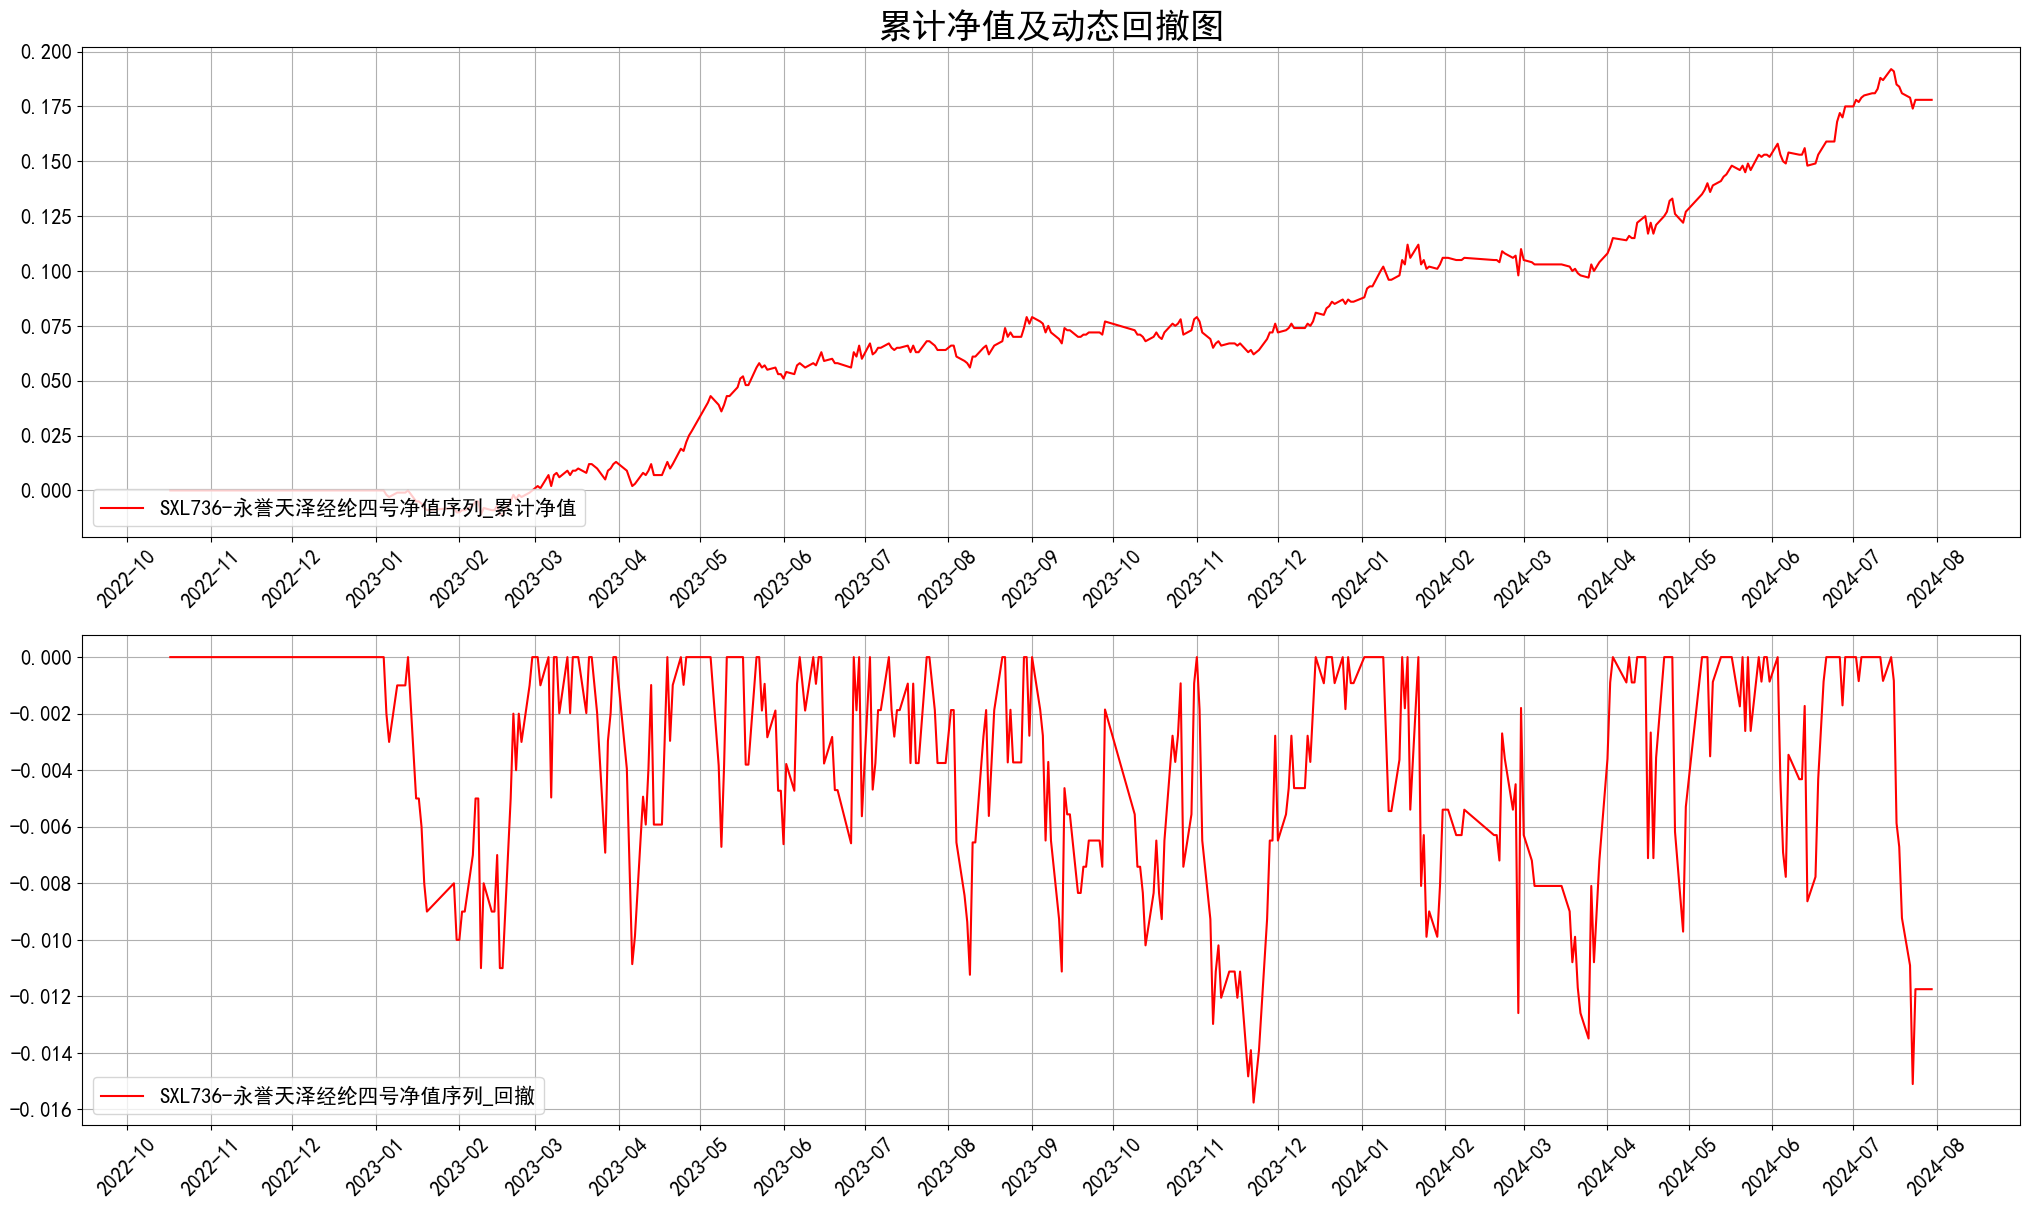

In [9]:
demo.plot()

## 自动生成index.html

In [19]:
from pathlib import Path


def generate_index_html(folder_path: Path):
    # 获取目录中的所有 HTML 文件
    html_files = folder_path.glob("*.html")
    print(html_files)

    # 创建一个新的 index.html 文件
    with open(folder_path.joinpath("index.html"), "w", encoding="utf-8") as f:
        f.write("""<html>\n<head>\n<meta charset="UTF-8">\n<title>Value over Time</title>\n</head>\n<body>""")
        # 为每个 HTML 文件创建一个链接
        for html_file in html_files:
            filename = html_file.name
            f.write(f'<a href="{filename}">{filename}</a><br/>\n')

        f.write("</body>\n</html>")


# 使用函数
generate_index_html(Path(r"C:\Euclid_Jie\barra\submodule\nav_analysis\nav_data"))

<generator object Path.glob at 0x000002813F07E020>


In [20]:
import http.server
import socketserver

# 定义服务器的端口
PORT = 8000

# 创建一个请求处理器
Handler = http.server.SimpleHTTPRequestHandler

# 将当前目录设置为服务器的根目录
Handler.directory = r"C:\Euclid_Jie\barra\submodule\nav_analysis\nav_data\index.html"

# 创建一个服务器
with socketserver.TCPServer(("", PORT), Handler) as httpd:
    print("serving at port", PORT)
    httpd.serve_forever()

serving at port 8000


127.0.0.1 - - [20/Sep/2024 10:51:13] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [20/Sep/2024 10:51:15] "GET /nav_data/ HTTP/1.1" 200 -
127.0.0.1 - - [20/Sep/2024 10:51:16] "GET /nav_data/20231108_20240730_ABA86A-%E5%BC%88%E5%80%8D%E9%BE%99%E6%9D%89%E4%B9%9D%E5%8F%B7A%E7%B1%BB%E5%87%80%E5%80%BC%E5%BA%8F%E5%88%97_nav_analysis.html HTTP/1.1" 200 -
127.0.0.1 - - [20/Sep/2024 10:51:22] "GET /nav_data/20231108_20240730_ABA86A-%E5%BC%88%E5%80%8D%E9%BE%99%E6%9D%89%E4%B9%9D%E5%8F%B7A%E7%B1%BB%E5%87%80%E5%80%BC%E5%BA%8F%E5%88%97_nav_analysis.html HTTP/1.1" 304 -


## 双庆backword analysis 需求

In [19]:
from utils import backword_analysis
import pandas as pd

nav_data = pd.read_excel(r"C:\Users\Ouwei\Desktop\nav_data\0829双庆\nav_data.xlsx")
# 截取时间
nav_data = nav_data[nav_data["日期"] >= pd.to_datetime("2019-12-30")]
nav_data.set_index("日期", inplace=True)
nav_data = nav_data.ffill(limit_area="inside")

In [57]:
out = pd.DataFrame()
for name in nav_data.columns:
    single_nav_data = nav_data[name].reset_index(drop=False)
    single_nav_data = single_nav_data[~single_nav_data[name].isna()]
    if len(single_nav_data) < 10:
        continue
    res = backword_analysis(
        single_nav_data[name].values, single_nav_data["日期"].values, freq="W"
    ).reset_index(drop=False)
    res["产品"] = name
    out = pd.concat([out, res], axis=0)
out["策略类型"] = out["产品"].apply(lambda x: x.split("_")[-1])

In [58]:
out = out[out["backword months"].isin(["12M", "24M", "36M"])]
out = out[
    ["策略类型", "产品", "backword months", "年化收益率", "年化波动率", "夏普比率"]
]

,策略类型,产品,backword months,年化收益率,年化波动率,夏普比率
3,期现套利,0_博普日添月益_期现套利,12M,8.483%,1.395%,6.080
4,期现套利,0_博普日添月益_期现套利,24M,6.714%,1.348%,4.980
5,期现套利,0_博普日添月益_期现套利,36M,5.890%,1.717%,3.431
3,1000中性,0_麦迪生利锐联中性对冲1号_1000中性,12M,12.449%,5.925%,2.101
3,500指增,0_超量子中证500增强2号_500指增,12M,-5.693%,24.438%,-0.233
...,...,...,...,...,...,...
3,可转债套利,2_悬铃稳健金选1号_可转债套利,12M,-2.845%,7.960%,-0.357
3,指增,2_弈倍虎鲸_指增,12M,-13.005%,23.790%,-0.547
4,指增,2_弈倍虎鲸_指增,24M,-10.528%,20.929%,-0.503
5,指增,2_弈倍虎鲸_指增,36M,-5.651%,19.902%,-0.284


In [65]:
year = 1
res = pd.DataFrame()
for i in ["12M", "24M", "36M"]:
    data_i = out[out["backword months"] == i]
    data_i = data_i.drop("backword months", axis=1)
    data_i = data_i.rename(
        {
            "年化收益率": f"过去{year}_年化收益率",
            "年化波动率": f"过去{year}_年化波动率",
            "夏普比率": f"过去{year}_夏普比率",
        },
        axis=1,
    )
    year += 1
    res = pd.concat([res, data_i])

In [75]:
year = 3
data_i = out[out["backword months"] == "36M"]
data_i = data_i.drop("backword months", axis=1)
data_i = data_i.rename(
    {
        "年化收益率": f"过去{year}_年化收益率",
        "年化波动率": f"过去{year}_年化波动率",
        "夏普比率": f"过去{year}_夏普比率",
    },
    axis=1,
)

In [76]:
data_3 = data_i.copy()

In [78]:
res = data_1.merge(data_2, on=["策略类型", "产品"], how="left")

In [3]:
res = res.merge(data_3, on=["策略类型", "产品"], how="left")

NameError: name 'res' is not defined

In [80]:
res

,策略类型,产品,过去1_年化收益率,过去1_年化波动率,过去1_夏普比率,过去2_年化收益率,过去2_年化波动率,过去2_夏普比率,过去3_年化收益率,过去3_年化波动率,过去3_夏普比率
0,期现套利,0_博普日添月益_期现套利,8.483%,1.395%,6.080,6.714%,1.348%,4.980,5.890%,1.717%,3.431
1,1000中性,0_麦迪生利锐联中性对冲1号_1000中性,12.449%,5.925%,2.101,NaN,NaN,NaN,NaN,NaN,NaN
2,500指增,0_超量子中证500增强2号_500指增,-5.693%,24.438%,-0.233,-2.434%,21.189%,-0.115,-1.386%,19.925%,-0.070
3,混合中性,0_超量子量化中性1号_混合中性,5.290%,4.335%,1.220,NaN,NaN,NaN,NaN,NaN,NaN
4,其他多策略,0_岳皋华山一号_其他多策略,8.214%,5.841%,1.406,NaN,NaN,NaN,NaN,NaN,NaN
5,其他多策略,0_岳皋泰山核心一号_其他多策略,5.742%,2.811%,2.042,6.145%,2.887%,2.129,NaN,NaN,NaN
6,混合中性,1_磐松市场中性进取1号_混合中性,30.651%,18.409%,1.665,NaN,NaN,NaN,NaN,NaN,NaN
7,主观CTA复合,1_草本优益1号_主观CTA复合,6.423%,11.164%,0.575,18.755%,15.280%,1.227,13.062%,16.105%,0.811
8,500中性,1_衍复春晓一期_500中性,11.074%,11.108%,0.997,7.048%,8.254%,0.854,7.617%,7.352%,1.036
9,1000中性,1_倍漾优博一号_1000中性,12.721%,11.295%,1.126,10.464%,9.162%,1.142,NaN,NaN,NaN


In [68]:
res.sort_values(["策略类型", "产品"]).to_csv(
    r"C:\Users\Ouwei\Desktop\res_backword_analysis.csv",
    index=False,
    encoding="utf_8_sig",
)

In [ ]:
out.to_csv(
    r"C:\Users\Ouwei\Desktop\backword_analysis.csv", index=False, encoding="utf-8-sig"
)

## 多只对比

In [23]:
from compare_nav_analysis import NavAnalysisConfig, CompareNavAnalysis
from pathlib import Path
import numpy as np

nav_analysis_config = NavAnalysisConfig(
    bench_data_path=Path(r"C:\Euclid_Jie\barra\src\nav_analysis\index_data.csv"),
    # nav_data_path=[
    #     Path(r"C:\Users\Ouwei\Desktop\nav_data\SGB773_麦迪生利锐联中性对冲1号.xlsx"),
    #     Path(
    #         r"C:/Users/Ouwei/Desktop/nav_data/净值0814/市场中性/天算中性B-SXU256.xlsx"
    #     ),
    # ],
    begin_date=np.datetime64("2023-12-29"),
    open_html=False,
    benchmark="SHSE.000905",
)
demo = CompareNavAnalysis(nav_analysis_config)
demo.anlysis()
# demo.export_html()

诚奇500B-SZH420，原始数据时间区间为：2023-02-17 - 2024-09-06
赫富500G-SQF460，原始数据时间区间为：2021-09-24 - 2024-09-06
幻方500S，原始数据时间区间为：2021-02-10 - 2024-09-06
九坤500B-SX1396，原始数据时间区间为：2017-11-24 - 2024-09-06
聚宽500P-SJJ717，原始数据时间区间为：2019-12-05 - 2024-09-06
宽德500S-SVN545，原始数据时间区间为：2022-11-04 - 2024-09-06
量锐500G-SQT083，原始数据时间区间为：2021-08-20 - 2024-09-06
灵均500S-SNE835，原始数据时间区间为：2020-11-20 - 2024-09-06
龙旗500G-SM4569，原始数据时间区间为：2022-07-08 - 2024-09-06
明汯500B-SLQ916，原始数据时间区间为：2020-08-20 - 2024-09-06
鸣石500S，原始数据时间区间为：2021-07-19 - 2024-09-06
念空500S，原始数据时间区间为：2022-09-23 - 2024-09-06
启林500G-SQA856，原始数据时间区间为：2021-07-09 - 2024-09-06
千象500G-SSY909，原始数据时间区间为：2022-03-03 - 2024-09-06
乾象500B-SXY696，原始数据时间区间为：2023-01-11 - 2024-09-06
世纪前沿500B-STL369，原始数据时间区间为：2022-02-11 - 2024-09-06
天演500ZS，原始数据时间区间为：2021-12-14 - 2024-09-06
顽岩500ZS，原始数据时间区间为：2023-11-21 - 2024-09-06
喜岳500ZS，原始数据时间区间为：2023-09-05 - 2024-09-06
星阔500P-SQC443，原始数据时间区间为：2021-07-09 - 2024-09-06
衍复500S，原始数据时间区间为：2022-07-08 - 2024-09-06
衍盛500P-SCY352，原始数据时间区间为：2018-06-08 -

In [24]:
demo.metrics_table

,年化收益率,年化波动率,最大回撤,夏普比率,开始日期,结束日期,持续天数,修复日期,修复天数
超额_诚奇500B-SZH420,7.554%,9.140%,-6.387%,0.827,2024-01-26,2024-02-08,13,2024-05-24,106.0
超额_赫富500G-SQF460,5.318%,9.496%,-7.626%,0.560,2023-12-29,2024-02-08,41,2024-03-22,43.0
超额_幻方500S,1.740%,19.341%,-17.207%,0.090,2024-01-26,2024-02-08,13,NaN,NaN
超额_九坤500B-SX1396,-0.958%,6.316%,-18.433%,-0.152,2024-01-09,2024-02-07,29,NaN,NaN
超额_聚宽500P-SJJ717,2.449%,15.175%,-11.123%,0.161,2024-01-26,2024-02-08,13,NaN,NaN
超额_宽德500S-SVN545,15.809%,15.161%,-7.923%,1.043,2024-01-26,2024-02-08,13,2024-03-22,43.0
超额_量锐500G-SQT083,-5.310%,9.535%,-8.560%,-0.557,2024-01-05,2024-02-08,34,NaN,NaN
超额_灵均500S-SNE835,0.392%,12.926%,-10.817%,0.030,2024-01-19,2024-02-08,20,NaN,NaN
超额_龙旗500G-SM4569,-4.474%,23.007%,-17.975%,-0.194,2024-01-26,2024-02-08,13,NaN,NaN
超额_明汯500B-SLQ916,9.886%,17.026%,-10.343%,0.581,2024-01-26,2024-02-08,13,2024-03-15,36.0
